# Heteroscedasticity and autocorrelation

### Heteroscedasticity

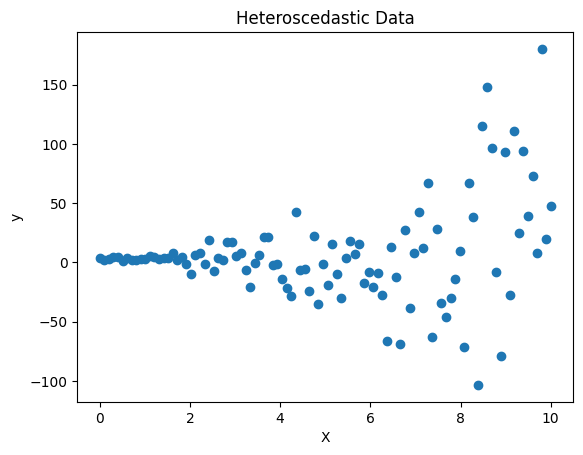

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Define the independent variable
X = np.linspace(0, 10, 100)

# Define the true coefficients
true_intercept = 2
true_slope = 0.5

# Generate heteroscedastic errors
error = np.random.randn(len(X)) * (1 + X**2)

# Generate the dependent variable with heteroscedasticity
y = true_intercept + true_slope * X + error

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Heteroscedastic Data')
plt.show()



**Breusch-Pagan Test - H0 is rejected, i.e. there is enough evidence for Heteroscedasticity**

In [68]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Set the random seed for reproducibility
np.random.seed(0)

# Define the independent variable
X = np.linspace(0, 10, 100)

# Define the true coefficients
true_intercept = 2
true_slope = 0.5

# Generate heteroscedastic errors
error = np.random.randn(len(X)) * (1 + X**2)

# Generate the dependent variable with heteroscedasticity
y = true_intercept + true_slope * X + error

# Fit the OLS regression model
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Calculate the residuals
residuals = results.resid

# Perform the Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", p_value)

# Set the significance level
alpha = 0.05

# Check if H0 is rejected
if p_value < alpha:
    
    print("Heteroscedasticity is present (H0 is rejected).")
else:
    print("Heteroscedasticity is not present (H0 is not rejected).")


Breusch-Pagan test p-value: 1.8213186249403432e-06
Heteroscedasticity is present (H0 is rejected).


**Breusch-Pagan Test - H0 is not rejected, i.e. there is not enough evidence for Heteroscedasticity**

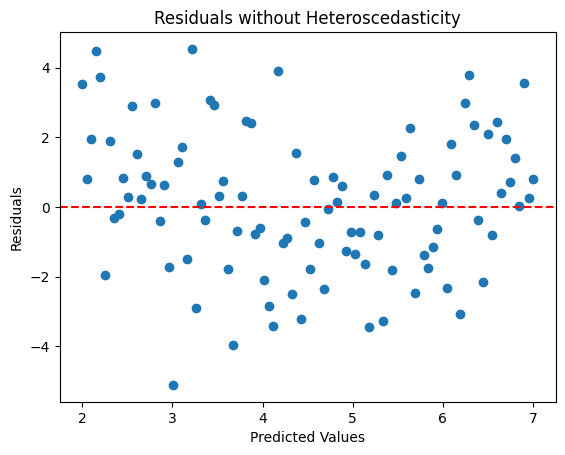

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Generate some random data
n = 100
X = np.linspace(0, 10, n)
true_intercept = 2
true_slope = 0.5
error = np.random.randn(n) * 2  # Constant variance
y = true_intercept + true_slope * X + error

# Calculate the predicted values
predicted_values = true_intercept + true_slope * X

# Calculate the residuals
residuals = y - predicted_values

# Plot the residuals against the predicted values
plt.scatter(predicted_values, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals without Heteroscedasticity')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.show()


In [77]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Set the random seed for reproducibility
np.random.seed(0)

# Generate some random data
n = 100
X = np.linspace(0, 10, n)
true_intercept = 2
true_slope = 0.5
error = np.random.randn(n) * 2  # Constant variance
y = true_intercept + true_slope * X + error

# Fit the OLS regression model
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

# Calculate the residuals
residuals = results.resid

# Perform the Breusch-Pagan test
_, p_value, _, _ = het_breuschpagan(residuals, X)

# Set the significance level
alpha = 0.05

# Check if H0 is rejected
if p_value < alpha:
    print("Heteroscedasticity is present (H0 is rejected).")
else:
    print("Heteroscedasticity is not present (H0 is not rejected).")


Heteroscedasticity is not present (H0 is not rejected).


### Autocorrelation

**Visualization

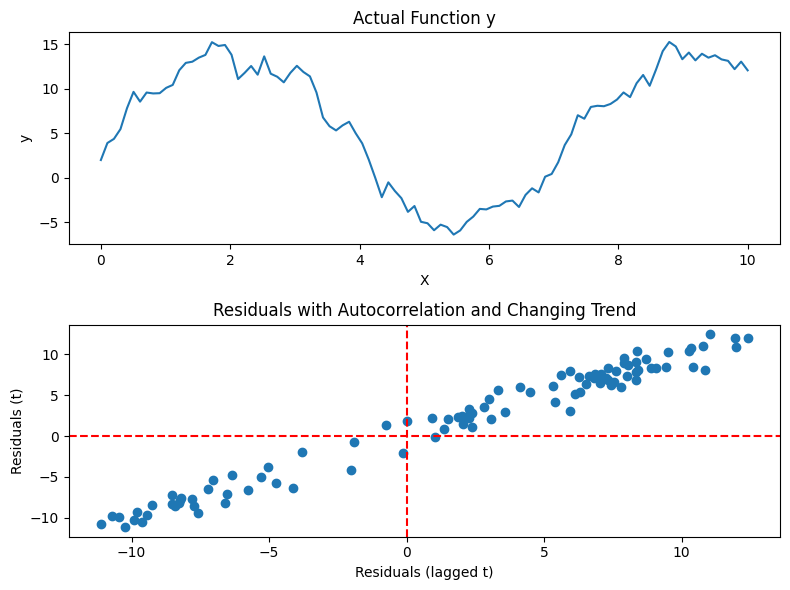

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(0)

# Generate some random data
n = 100
X = np.linspace(0, 10, n)
true_intercept = 2
true_slope = 0.5

# Generate autocorrelated errors with changing trend
error = np.zeros(n)
trend = np.sin(X)  # Changing trend
for i in range(1, n):
    error[i] = 0.9 * error[i-1] + np.random.randn() + trend[i]

# Generate the dependent variable with autocorrelated errors and changing trend
y = true_intercept + true_slope * X + error

# Calculate the residuals
residuals = y - (true_intercept + true_slope * X)

# Plot the actual function y
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual Function y')

# Plot the residuals against their lagged values
plt.subplot(2, 1, 2)
plt.scatter(residuals[:-1], residuals[1:])
plt.xlabel('Residuals (lagged t)')
plt.ylabel('Residuals (t)')
plt.title('Residuals with Autocorrelation and Changing Trend')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at zero
plt.axvline(x=0, color='r', linestyle='--')  # Add a vertical line at zero

plt.tight_layout()
plt.show()


In [89]:
# Perform Durbin-Watson test for autocorrelation
dw_statistic = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statistic)

Durbin-Watson statistic: 0.02478690902579588
